In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import pyregion
import matplotlib.patches as mpatches

In [2]:
plt.style.use(astropy_mpl_style)
plt.rcParams['axes.facecolor'] = 'black'

plt.rcParams['legend.facecolor']= 'white'
plt.rc('text', usetex=True)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


(301.0870084660354, 310.15748326508333)
(337.1735021705648, 389.374247224408)


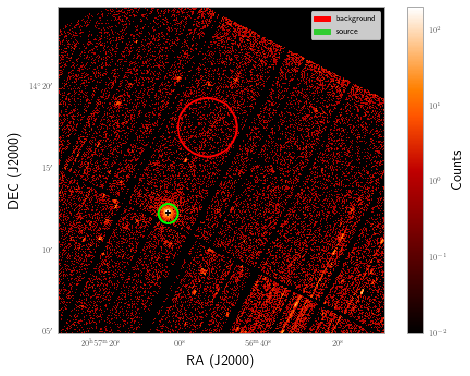

In [3]:
plt.style.use(astropy_mpl_style)
plt.rcParams['axes.facecolor'] = 'black'

plt.rcParams['legend.facecolor']= 'white'
plt.rc('text', usetex=True)



image_file = 'data/PNimage.fits'
f = fits.open(image_file)

region_string="""
# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(20:57:02.897,+14:12:14.40,0.00972222) # width=2
circle(20:56:52.969,+14:17:31.27,0.03) # color=red width=2
"""

#optical transient location: 20:57:02.98 +14:12:16.3

r2 = pyregion.parse(region_string).as_imagecoord(f[0].header)

wcs = WCS(f[0].header)


image_data = fits.getdata(image_file, ext=0)




def fct():
    f = plt.figure()
    ax = f.add_subplot(111,projection=wcs)

    mesh = ax.imshow(image_data,norm=colors.LogNorm(vmin=0.01, vmax=200))


    return ax, mesh

ax, mesh = fct()
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Counts')
               
plt.grid(False)

patch_list, artist_list = r2.get_mpl_patches_texts()
# ax is a mpl Axes object
for p in patch_list:
    print(p.center)
    ax.add_patch(p)
for t in artist_list:
    ax.add_artist(t)


import matplotlib.patches as mpatches
colors=['r','limegreen']#
    
labels=['background','source']
patches=[]
for i,c in enumerate(colors):
    patches.append(mpatches.Patch(color=c, label=labels[i])) #create legend obj for each filter color
plt.legend(handles=patches)



ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

plt.xlim(200,500)
plt.ylim(200,500)

plt.xlabel('RA (J2000)')
plt.ylabel('DEC (J2000)')

ax.set_facecolor("k")

#mark the position of the optical source (314.262416 +14.204515) 
plt.scatter(300.78532689500474, 310.6325167667993,
            marker='+', s=40, color='k', edgecolors='k',linewidths=2,
            zorder=10,alpha=1 ,label='optical transient')

plt.savefig('plots/extended_data_figure_4_xmm_countmap.pdf')
plt.show()